In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

In [3]:
from saplings.criteria import Gini
from saplings.decision_tree import DecisionTree
from saplings.metrics import accuracy_score
from saplings.training import train_test_split

In [4]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
clf = DecisionTree(Gini())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
# loss = Gini().loss(y_train, y_pred)
# print(f"loss: {loss:.4f}")

[(-2.494925513419171, 10.867910112115798),
 (-4.6223371064746015, 4.7954450743727755)]

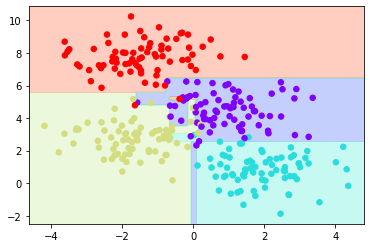

In [29]:
cmap="rainbow"

ax = plt.gca()
ax.scatter(
        X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3
    )

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

n_classes = len(np.unique(y))
contours = ax.contourf(
    xx,
    yy,
    Z,
    alpha=0.3,
    levels=np.arange(n_classes + 1) - 0.5,
    cmap=cmap,
    zorder=1,
)
ax.set(xlim=xlim, ylim=ylim)
